## 1. CoolNameNet

```
CoolNameNet( 
  (embeddings): Embedding(12071, 500)
  (lstm): LSTM(500, 20, num_layers=2, dropout=0.1, bidirectional=True)
  (linear1): Linear(in_features=40, out_features=20, bias=True)
  (linear2): Linear(in_features=20, out_features=6, bias=True)
)
```

### 1.1. Load data

We are using the concatenation of pre-trained embeddings:
- Fasttext trained on wiki (300d)
- Glove trained on twitter (200d)

In [1]:
from loader import *

In [2]:
%%time
loader = ToxicLoader(vectors=['fasttext.en.300d', 'glove.twitter.27B.200d'])

Done preparing the datasets                                                                         
CPU times: user 2min 31s, sys: 2.75 s, total: 2min 33s
Wall time: 2min 32s


### 1.2. Train the model

In [16]:
from models import CoolNameNet
import torch.nn as nn
import torch.optim as optim

BATCH_SIZE = 512
EMBEDDING_DIM = 500

model = CoolNameNet(loader.vocab_size(), EMBEDDING_DIM, 20, vectors=loader.emb_matrix()).cuda()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.00001)
loss_func = nn.BCELoss()

In [4]:
from train import train
from sklearn.metrics import roc_auc_score

results = train(model, loader.train_iterator(BATCH_SIZE), 
      optimizer, loss_func, metric=roc_auc_score, 
      data_val=loader.val_iterator(1024), n_epochs=20)

Epoch 0 - avg_time/epoch: 23.00s - epoch_duration 23.00s                                            
    Train Loss: 0.195, Train Score 0.726, Val. Loss: 0.070, Val. Score: 0.956
    Saved Model as <<CoolNameNet.txt>>.
Epoch 1 - avg_time/epoch: 24.18s - epoch_duration 22.85s                                            
    Train Loss: 0.058, Train Score 0.965, Val. Loss: 0.056, Val. Score: 0.968
    Saved Model as <<CoolNameNet.txt>>.
Epoch 2 - avg_time/epoch: 24.59s - epoch_duration 22.78s                                            
    Train Loss: 0.051, Train Score 0.972, Val. Loss: 0.052, Val. Score: 0.971
    Saved Model as <<CoolNameNet.txt>>.
Epoch 3 - avg_time/epoch: 24.99s - epoch_duration 23.58s                                            
    Train Loss: 0.049, Train Score 0.974, Val. Loss: 0.052, Val. Score: 0.972
    Saved Model as <<CoolNameNet.txt>>.
Epoch 4 - avg_time/epoch: 25.11s - epoch_duration 23.01s                                            
    Train Loss: 0.048, 

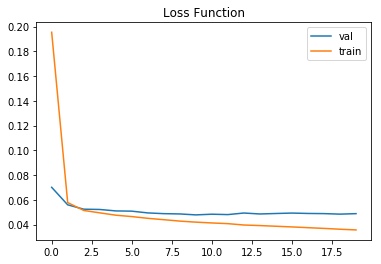

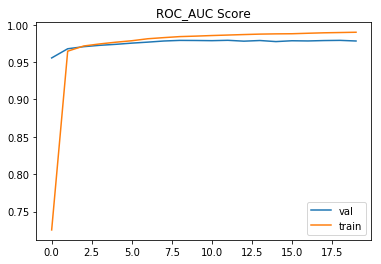

In [10]:
from train import plot_result, evaluate
plot_result(results)

### Evaluate best model (best validation score) during training

In [13]:
# Load best model
from util import load_model

model = load_model('CoolNameNet')
loss, score = evaluate(model, loader.test_iterator(1024), loss_func, roc_auc_score)
print('Test Loss: {:.4f}, Test Score: {:.4f}'.format(loss, score))

Test Loss: 0.0761, Test Score: 0.9726


## 2. CoolerNameNet

```
CoolerNameNet(
  (embeddings): Embedding(12071, 500)
  (dropout): Dropout(p=0.5)
  (lstm): LSTM(500, 20, bidirectional=True)
  (gru): GRU(40, 20, bidirectional=True)
  (linear1): Linear(in_features=120, out_features=6, bias=True)
)
```

In [37]:
from models import CoolerNameNet
import torch.nn as nn
import torch.optim as optim

BATCH_SIZE = 512
EMBEDDING_DIM = 500

model = CoolerNameNet(loader.vocab_size(), EMBEDDING_DIM, 20, vectors=loader.emb_matrix(), freeze=True).cuda()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.BCELoss()

In [38]:
from train import train
from sklearn.metrics import roc_auc_score

results = train(model, loader.train_iterator(BATCH_SIZE), 
      optimizer, loss_func, metric=roc_auc_score, 
      data_val=loader.val_iterator(1024), n_epochs=20)

Epoch 0 - avg_time/epoch: 18.91s - epoch_duration 18.91s                                            
    Train Loss: 0.154, Train Score 0.769, Val. Loss: 0.067, Val. Score: 0.956
    Saved Model as <<CoolerNameNet.txt>>.
Epoch 1 - avg_time/epoch: 20.02s - epoch_duration 18.79s                                            
    Train Loss: 0.056, Train Score 0.967, Val. Loss: 0.053, Val. Score: 0.967
    Saved Model as <<CoolerNameNet.txt>>.
Epoch 2 - avg_time/epoch: 20.41s - epoch_duration 18.84s                                            
    Train Loss: 0.050, Train Score 0.972, Val. Loss: 0.051, Val. Score: 0.971
    Saved Model as <<CoolerNameNet.txt>>.
Epoch 3 - avg_time/epoch: 20.79s - epoch_duration 19.63s                                            
    Train Loss: 0.048, Train Score 0.975, Val. Loss: 0.050, Val. Score: 0.972
    Saved Model as <<CoolerNameNet.txt>>.
Epoch 4 - avg_time/epoch: 20.91s - epoch_duration 19.06s                                            
    Train Loss:

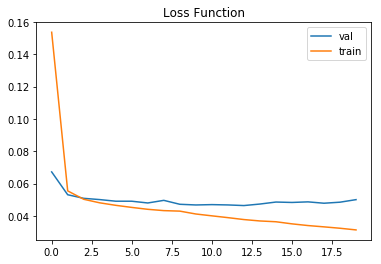

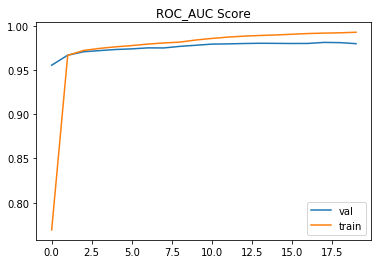

In [39]:
from train import plot_result, evaluate
plot_result(results)

In [40]:
# Load best model
from util import load_model

model = load_model('CoolerNameNet')
loss, score = evaluate(model, loader.test_iterator(1024), loss_func, roc_auc_score)
print('Test Loss: {:.4f}, Test Score: {:.4f}'.format(loss, score))

Test Loss: 0.0757, Test Score: 0.9766
